<a href="https://colab.research.google.com/github/smrusmn/DeepLearning_Pytorch/blob/master/FirstAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
def generate_data(m):
  angles = np.random.rand(m)*3*np.pi/2 - 0.5
  data_array = np.empty((m,3))
  data_array[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1*np.random.rand(m)/2
  data_array[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.rand(m)/2
  data_array[:,2] = data_array[:,0] * 0.1 + data_array[:,1] * 0.3 + 0.1 * (np.random.rand(m))

  return data_array

<ipython-input-72-005a43da3b68>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X_train[:,0],X_train[:,1],X_train[:,2],cmap='Reds');


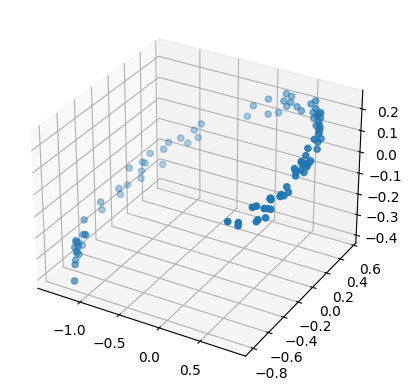

In [72]:
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)
X_train = torch.FloatTensor(X_train)

ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0],X_train[:,1],X_train[:,2],cmap='Reds');

In [73]:
class Encoder(nn.Module):
  def __init__(self,input_size, output_size):
    super(Encoder,self).__init__()
    self.Layer1 = nn.Linear(input_size, output_size)
  def forward(self, x):
    out = self.Layer1(x)
    return out

encoder = Encoder(3,2)


In [74]:
class Decoder(nn.Module):
  def __init__(self,input_size, output_size):
    super(Decoder, self).__init__()
    self.Layer1 = nn.Linear(input_size, output_size)
  def forward(self, x):
    out = self.Layer1(x)
    return out


decoder = Decoder(2,3)


In [75]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = Encoder(3,2)
    self.decoder = Decoder(2,3)

  def forward(self, x):
    out = self.encoder(x)
    out = self.decoder(out)
    return out


model = AutoEncoder()

In [76]:
model

AutoEncoder(
  (encoder): Encoder(
    (Layer1): Linear(in_features=3, out_features=2, bias=True)
  )
  (decoder): Decoder(
    (Layer1): Linear(in_features=2, out_features=3, bias=True)
  )
)

In [77]:
def fit(X_train,model, lr=0.01,epochs=200, optim=torch.optim.Adam,loss_func=nn.MSELoss()):
  history = []
  optimizer = optim(model.parameters(),lr=lr)
  for epoch in range(epochs):
    outputs = model(X_train)
    loss = loss_func(outputs, X_train)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
    history.append(loss.item())
  return history

In [78]:
history = fit(X_train=X_train, model = model)

Epoch [1/200], Loss: 0.4309
Epoch [2/200], Loss: 0.4127
Epoch [3/200], Loss: 0.3952
Epoch [4/200], Loss: 0.3784
Epoch [5/200], Loss: 0.3622
Epoch [6/200], Loss: 0.3467
Epoch [7/200], Loss: 0.3318
Epoch [8/200], Loss: 0.3176
Epoch [9/200], Loss: 0.3040
Epoch [10/200], Loss: 0.2912
Epoch [11/200], Loss: 0.2790
Epoch [12/200], Loss: 0.2676
Epoch [13/200], Loss: 0.2569
Epoch [14/200], Loss: 0.2470
Epoch [15/200], Loss: 0.2379
Epoch [16/200], Loss: 0.2294
Epoch [17/200], Loss: 0.2216
Epoch [18/200], Loss: 0.2145
Epoch [19/200], Loss: 0.2080
Epoch [20/200], Loss: 0.2019
Epoch [21/200], Loss: 0.1963
Epoch [22/200], Loss: 0.1911
Epoch [23/200], Loss: 0.1861
Epoch [24/200], Loss: 0.1813
Epoch [25/200], Loss: 0.1766
Epoch [26/200], Loss: 0.1720
Epoch [27/200], Loss: 0.1675
Epoch [28/200], Loss: 0.1629
Epoch [29/200], Loss: 0.1582
Epoch [30/200], Loss: 0.1535
Epoch [31/200], Loss: 0.1487
Epoch [32/200], Loss: 0.1438
Epoch [33/200], Loss: 0.1388
Epoch [34/200], Loss: 0.1337
Epoch [35/200], Loss: 0

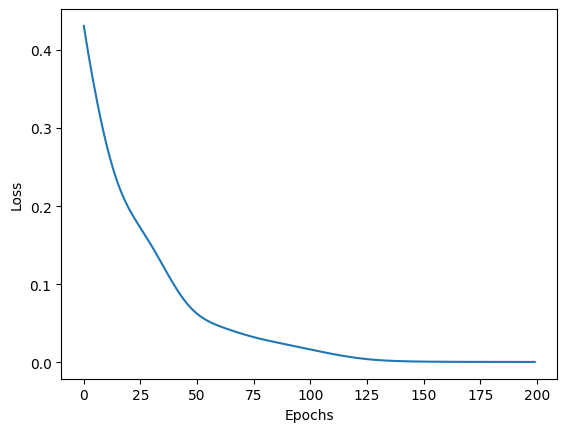

In [79]:

plt.plot(history, label='Training_Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [89]:
encodings = model.encoder(X_train).detach().numpy()
encodings.shape, X_train.shape

((100, 2), torch.Size([100, 3]))

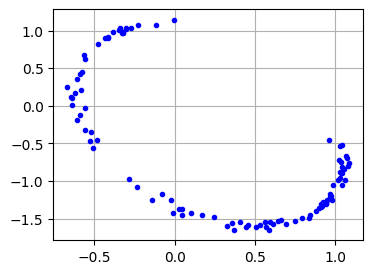

In [90]:
fig = plt.figure(figsize=(4,3))
plt.plot(encodings[:,0], encodings[:, 1], "b.")
plt.grid(True)
plt.show()

In [91]:
encodings[0], X_train[0]

(array([ 0.3699659, -1.6490345], dtype=float32),
 tensor([0.6093, 0.4783, 0.2386]))

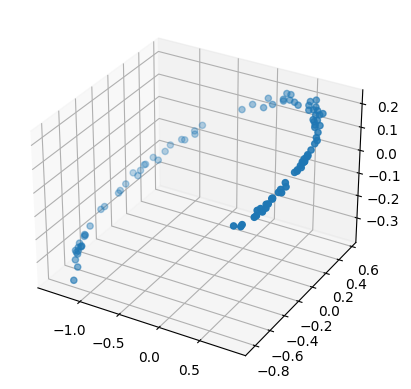

In [96]:
X_outs = model(X_train).detach().numpy()
ax = plt.axes(projection='3d')
ax.scatter3D(X_outs[:,0],X_outs[:,1],X_outs[:,2]);